### Logistic Regression Assignment

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Getting the dataset (To be run once)
'''
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'
response = requests.get(url)

with open('lr_assignment.csv', 'wb') as file:
    file.write(response.content)
'''

"\nurl = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'\nresponse = requests.get(url)\n\nwith open('lr_assignment.csv', 'wb') as file:\n    file.write(response.content)\n"

In [3]:
df = pd.read_csv('lr_assignment.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
used_cols = ['Make', 'Model', 'Year', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
        'highway MPG', 'city mpg', 'MSRP' ]

In [7]:
df_sub = df[used_cols]
df_sub.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [8]:
df_sub.columns = df_sub.columns.str.replace(' ', '_').str.lower()
df_sub.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [9]:
df_sub.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [10]:
df_sub = df_sub.fillna(0)

In [11]:
df_sub.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [12]:
df_sub['price'] = df_sub['msrp']
df_sub.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,34500


In [13]:
#to check the most common transmission type
df_sub.transmission_type.value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

In [14]:
del df_sub['msrp']

In [15]:
df_sub.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [16]:
numerical = ['year', 'highway_mpg', 'city_mpg','engine_hp', 'engine_cylinders']

In [17]:
correlation_matrix = df_sub[numerical].corr()

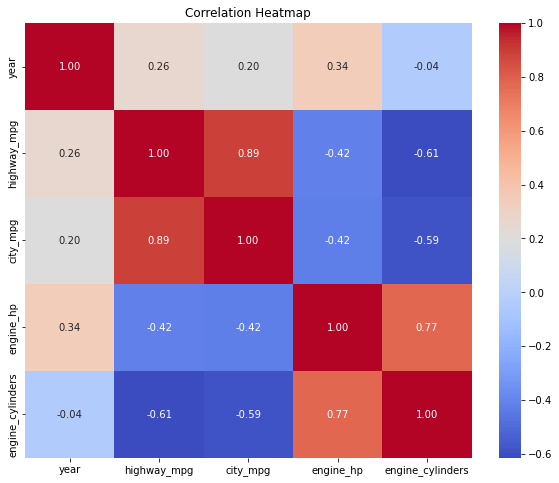

In [18]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# Print the correlation table
print("Correlation Table:")
print(correlation_matrix.to_string())

Correlation Table:
                      year  highway_mpg  city_mpg  engine_hp  engine_cylinders
year              1.000000     0.258240  0.198171   0.338714         -0.040708
highway_mpg       0.258240     1.000000  0.886829  -0.415707         -0.614541
city_mpg          0.198171     0.886829  1.000000  -0.424918         -0.587306
engine_hp         0.338714    -0.415707 -0.424918   1.000000          0.774851
engine_cylinders -0.040708    -0.614541 -0.587306   0.774851          1.000000


In [20]:
df_sub['price'].mean()

40594.737032063116

In [21]:
# tring to convert into boolean
df_sub = df_sub.copy()
# Calculate the mean price
mean_price = df_sub['price'].mean()

# Create the 'above_average' variable
df_sub['above_average'] = (df_sub['price'] > mean_price).astype(int)

In [22]:
df_sub.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [23]:
df_sub.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
above_average          int32
dtype: object

In [24]:
# cleaning the object columns

categorical_columns = list(df_sub.dtypes[df_sub.dtypes == 'object'].index)

for c in categorical_columns:
    df_sub[c] = df_sub[c].str.lower().str.replace(' ','_')

In [25]:
df_sub

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,bmw,1_series_m,2011,335.0,6.0,manual,coupe,26,19,46135,1
1,bmw,1_series,2011,300.0,6.0,manual,convertible,28,19,40650,1
2,bmw,1_series,2011,300.0,6.0,manual,coupe,28,20,36350,0
3,bmw,1_series,2011,230.0,6.0,manual,coupe,28,18,29450,0
4,bmw,1_series,2011,230.0,6.0,manual,convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,46120,1
11910,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,56670,1
11911,acura,zdx,2012,300.0,6.0,automatic,4dr_hatchback,23,16,50620,1
11912,acura,zdx,2013,300.0,6.0,automatic,4dr_hatchback,23,16,50920,1


#### Training the dataset

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
random_seed = 42

df_full_train, df_test = train_test_split(df_sub, test_size= 0.2, random_state=random_seed)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state=random_seed)

In [28]:
len(df_test), len(df_val), len(df_train)

(2383, 2383, 7148)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [30]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,mitsubishi,endeavor,2011,225.0,6.0,automatic,4dr_suv,19,15,33599,0
1,kia,borrego,2009,276.0,6.0,automatic,4dr_suv,21,17,26245,0
2,lamborghini,gallardo,2012,570.0,10.0,manual,convertible,20,12,248000,1
3,chevrolet,colorado,2016,200.0,4.0,automatic,crew_cab_pickup,27,20,24990,0
4,pontiac,vibe,2009,158.0,4.0,automatic,4dr_hatchback,26,20,20475,0
...,...,...,...,...,...,...,...,...,...,...,...
7143,toyota,sienna,2016,266.0,6.0,automatic,passenger_minivan,25,18,37655,0
7144,chevrolet,hhr,2009,260.0,4.0,manual,wagon,29,21,25135,0
7145,hyundai,veracruz,2012,260.0,6.0,automatic,4dr_suv,22,17,28345,0
7146,mitsubishi,expo,1993,136.0,4.0,manual,2dr_hatchback,26,19,2000,0


In [31]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [32]:
#deleting the above_average amd price column from the dataset

df_train.drop(['above_average', 'price'], axis=1, inplace=True)
df_val.drop(['above_average', 'price'], axis=1, inplace=True)
df_test.drop(['above_average', 'price'], axis=1, inplace=True)

In [33]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,mitsubishi,endeavor,2011,225.0,6.0,automatic,4dr_suv,19,15
1,kia,borrego,2009,276.0,6.0,automatic,4dr_suv,21,17
2,lamborghini,gallardo,2012,570.0,10.0,manual,convertible,20,12
3,chevrolet,colorado,2016,200.0,4.0,automatic,crew_cab_pickup,27,20
4,pontiac,vibe,2009,158.0,4.0,automatic,4dr_hatchback,26,20


#### Mutual Information Score

In [34]:
from sklearn.metrics import mutual_info_score

In [35]:
df_full_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
3181,cadillac,ct6,2016,265.0,4.0,automatic,sedan,31,22,53495,1
5357,mercedes-benz,gls-class,2017,449.0,8.0,automatic,4dr_suv,18,14,93850,1
4874,kia,forte,2016,173.0,4.0,automatic,coupe,34,25,19890,0
8102,dodge,ram_250,1993,180.0,6.0,manual,regular_cab_pickup,16,11,2000,0
10400,hyundai,tiburon,2008,172.0,6.0,automatic,2dr_hatchback,24,17,21270,0


In [36]:
def mutual_info_price_score(series):
    return mutual_info_score(series, df_full_train.above_average)

In [37]:
categorical_columns

['make', 'model', 'transmission_type', 'vehicle_style']

In [38]:
mi = df_full_train[categorical_columns].apply(mutual_info_price_score)
round(mi.sort_values(ascending= False), 2)

model                0.46
make                 0.24
vehicle_style        0.08
transmission_type    0.02
dtype: float64

#### One hot encoding

In [39]:
# using it for all variables
train_dicts = df_train[categorical_columns + numerical].to_dict(orient= 'records')

In [40]:
train_dicts[0]

{'make': 'mitsubishi',
 'model': 'endeavor',
 'transmission_type': 'automatic',
 'vehicle_style': '4dr_suv',
 'year': 2011,
 'highway_mpg': 19,
 'city_mpg': 15,
 'engine_hp': 225.0,
 'engine_cylinders': 6.0}

In [41]:
from sklearn.feature_extraction import DictVectorizer

In [42]:
dv = DictVectorizer(sparse=False)

In [43]:
X_train = dv.fit_transform(train_dicts)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [46]:
model.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [47]:
model.intercept_[0]

-0.3143592600950215

In [48]:
# using it for all variables
val_dicts = df_val[categorical_columns + numerical].to_dict(orient= 'records')

In [49]:
X_val = dv.transform(val_dicts)

In [50]:
#apply the data on validation set

y_pred = model.predict_proba(X_val)[: , 1]
y_pred

array([2.39236829e-03, 9.94645108e-01, 2.29997224e-04, ...,
       7.92526260e-04, 9.87109181e-01, 9.78450741e-01])

In [51]:
price_prediction = (y_pred >= 0.5)

In [52]:
price_prediction

array([False,  True, False, ..., False,  True,  True])

In [53]:
#check to see how many predictions were correct
(y_val == price_prediction).mean()

0.9433487201007134

In [54]:
target = df_sub['above_average']

In [55]:
features = categorical_columns + numerical

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
all_features_accuracy = accuracy_score(y_val, model.predict(X_val))

In [58]:
df_sub[features]

,make,model,transmission_type,vehicle_style,year,highway_mpg,city_mpg,engine_hp,engine_cylinders
0,bmw,1_series_m,manual,coupe,2011,26,19,335.0,6.0
1,bmw,1_series,manual,convertible,2011,28,19,300.0,6.0
2,bmw,1_series,manual,coupe,2011,28,20,300.0,6.0
3,bmw,1_series,manual,coupe,2011,28,18,230.0,6.0
4,bmw,1_series,manual,convertible,2011,28,18,230.0,6.0
...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,automatic,4dr_hatchback,2012,23,16,300.0,6.0
11910,acura,zdx,automatic,4dr_hatchback,2012,23,16,300.0,6.0
11911,acura,zdx,automatic,4dr_hatchback,2012,23,16,300.0,6.0
11912,acura,zdx,automatic,4dr_hatchback,2013,23,16,300.0,6.0


In [59]:
df_sub = df_sub.copy()
y = df_sub['above_average']
# Initialize a dictionary to store feature removal and accuracy
accuracy_dict = {}

# Iterate through each feature, remove it, and calculate accuracy
for feature in features:
    # Temporary list excluding the current feature
    reduced_features = [col for col in features if col != feature]
    
    # Prepare data with reduced features
    X_reduced = df_sub[reduced_features]
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
    
    # Train a logistic regression model with reduced features
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Calculate accuracy with reduced features
    reduced_features_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    # Store the difference in accuracy compared to using all features
    accuracy_difference = all_features_accuracy - reduced_features_accuracy
    accuracy_dict[feature] = accuracy_difference


# Print accuracy differences for each feature
print("Accuracy Differences (compared to using all features):")
print(accuracy_dict)

ValueError: could not convert string to float: 'ct6'

In [ ]:

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values
    y_test = df_test.above_average.values

    #deleting the above_average amd price column from the dataset
    '''
    df_train.drop(['above_average', 'price'], axis=1, inplace=True)
    df_val.drop(['above_average', 'price'], axis=1, inplace=True)
    df_test.drop(['above_average', 'price'], axis=1, inplace=True)'''
    
    # using it for all train variables
    train_dicts = df_train[reduced_features].to_dict(orient= 'records')
    
    # using it for all validation variables
    val_dicts = df_val[reduced_features].to_dict(orient= 'records')
    
    X_train = dv.fit_transform(train_dicts)

    X_val = dv.transform(val_dicts)
    
    # Train a logistic regression model with reduced features
    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Calculate accuracy with reduced features
    reduced_features_accuracy = accuracy_score(y_val, model.predict(X_val))
    
    # Store the difference in accuracy compared to using all features
    accuracy_difference = all_features_accuracy - reduced_features_accuracy
    accuracy_dict[feature] = accuracy_difference

# Print accuracy differences for each feature
print("Accuracy Differences (compared to using all features):")
print(accuracy_dict)

In [60]:
print (df_sub)

          make       model  year  engine_hp  engine_cylinders  \
0          bmw  1_series_m  2011      335.0               6.0   
1          bmw    1_series  2011      300.0               6.0   
2          bmw    1_series  2011      300.0               6.0   
3          bmw    1_series  2011      230.0               6.0   
4          bmw    1_series  2011      230.0               6.0   
...        ...         ...   ...        ...               ...   
11909    acura         zdx  2012      300.0               6.0   
11910    acura         zdx  2012      300.0               6.0   
11911    acura         zdx  2012      300.0               6.0   
11912    acura         zdx  2013      300.0               6.0   
11913  lincoln      zephyr  2006      221.0               6.0   

      transmission_type  vehicle_style  highway_mpg  city_mpg  price  \
0                manual          coupe           26        19  46135   
1                manual    convertible           28        19  40650   
2  